<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Social_media_number_of_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('OnlineNewsPopularity.csv')

In [17]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
data.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [19]:
data.shape

(39644, 61)

In [21]:
data['url'][2000]

'http://mashable.com/2013/02/10/wedding-proposal-videos/'

In [22]:
import nltk
import re
import string
from datetime import datetime

In [23]:
date=[]
date_original=[]

for i in range(data.shape[0]):
    x=re.findall(r'[0-9]{4}/[0-9]{2}/[0-9]{2}',data['url'][i])
    date.append(x)
    
for i in date:
    for r in i:
        date_original.append(r)

In [24]:
data['date']=date_original

In [25]:
data['date']= pd.to_datetime(data['date'])

In [26]:
import warnings 
warnings.filterwarnings('ignore')

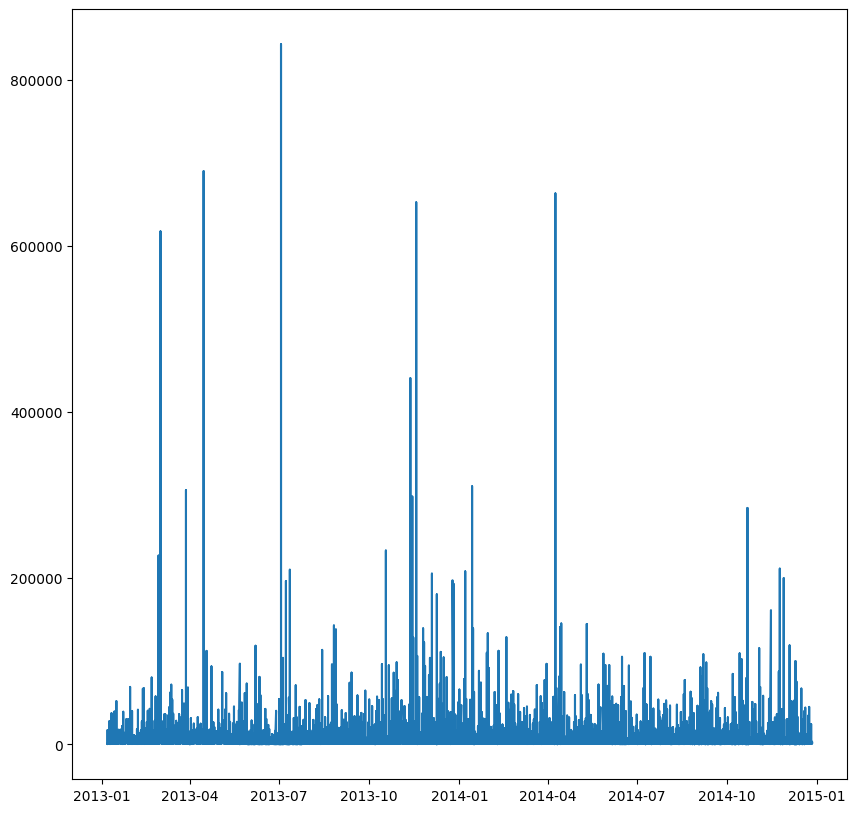

In [28]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
plt.plot(data['date'],data['shares'])
plt.show()

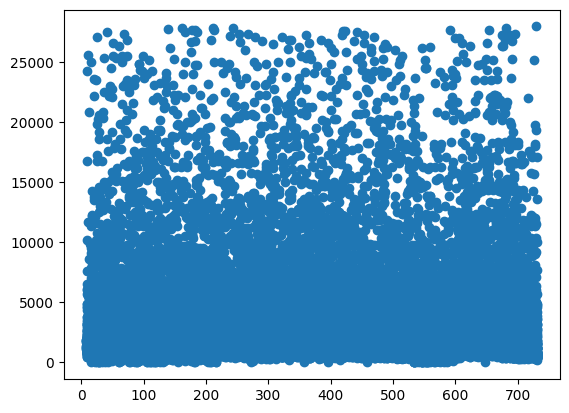

In [36]:
plt.scatter(data['timedelta'],data['shares'])

In [31]:
data.shape[0]

39644

In [32]:
for i in range(data.shape[0]):
    if data['shares'][i] > 28000:
        data.drop(index=i,inplace=True)

In [33]:
data=data.reset_index(drop=True)

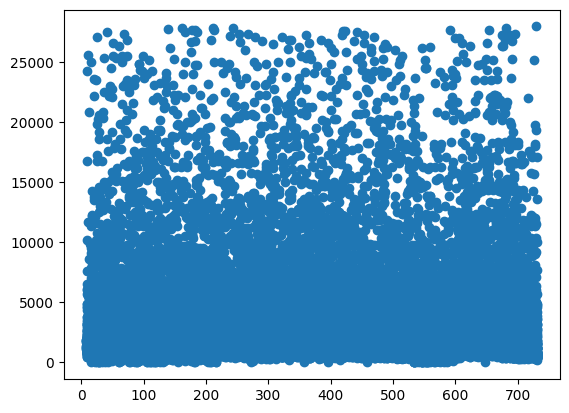

In [35]:
plt.scatter(data['timedelta'],data['shares'])

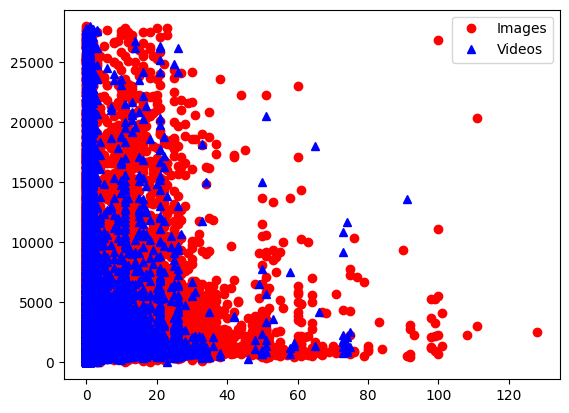

In [37]:
plt.plot(data['num_imgs'],data['shares'],'ro',label='Images')
plt.plot(data['num_videos'],data['shares'],'b^',label='Videos')
plt.legend()

<Axes: title={'center': "The 'Sharing' distribution of whole dataset"}, xlabel='shares', ylabel='Density'>

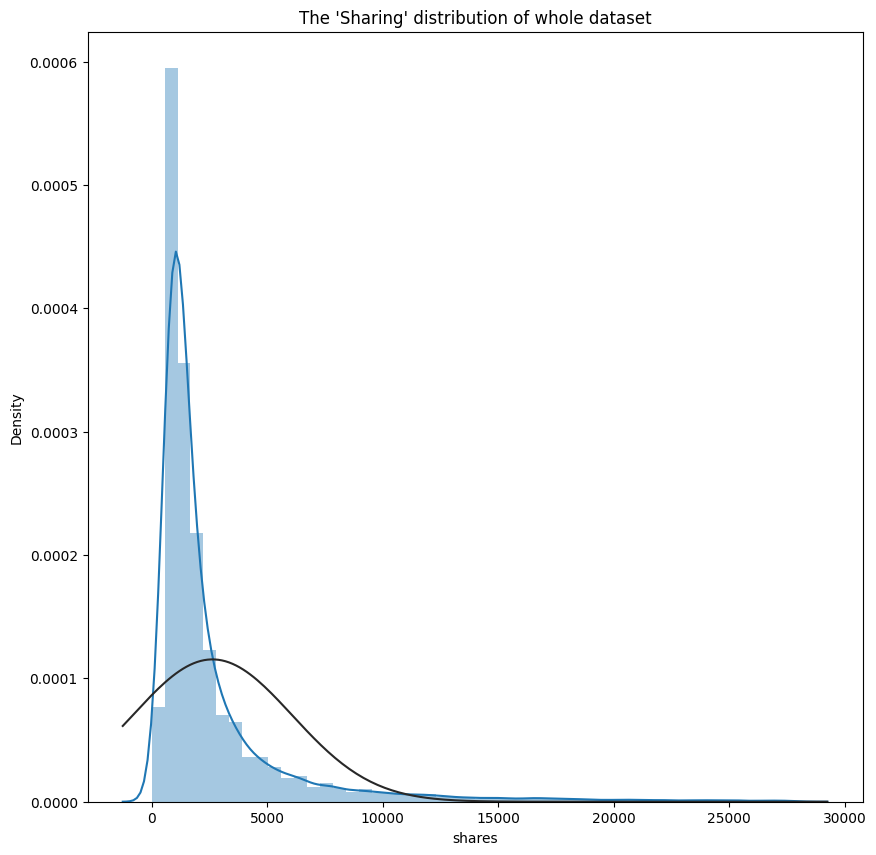

In [40]:
from scipy.stats import norm
fig= plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title("The 'Sharing' distribution of whole dataset")
sns.distplot(data['shares'],ax=ax, fit=norm)

In [44]:
lifestyle_articles=data[data['data_channel_is_lifestyle'] == 1]['shares'].sum()
entertainment_articles=data[data['data_channel_is_entertainment'] == 1]['shares'].sum()
business_articles=data[data['data_channel_is_bus'] == 1]['shares'].sum()
socialmedia_articles=data[data['data_channel_is_socmed'] == 1]['shares'].sum()
technical_articles=data[data['data_channel_is_tech'] == 1]['shares'].sum()
world_articles=data[data['data_channel_is_world'] == 1]['shares'].sum()

<BarContainer object of 5 artists>

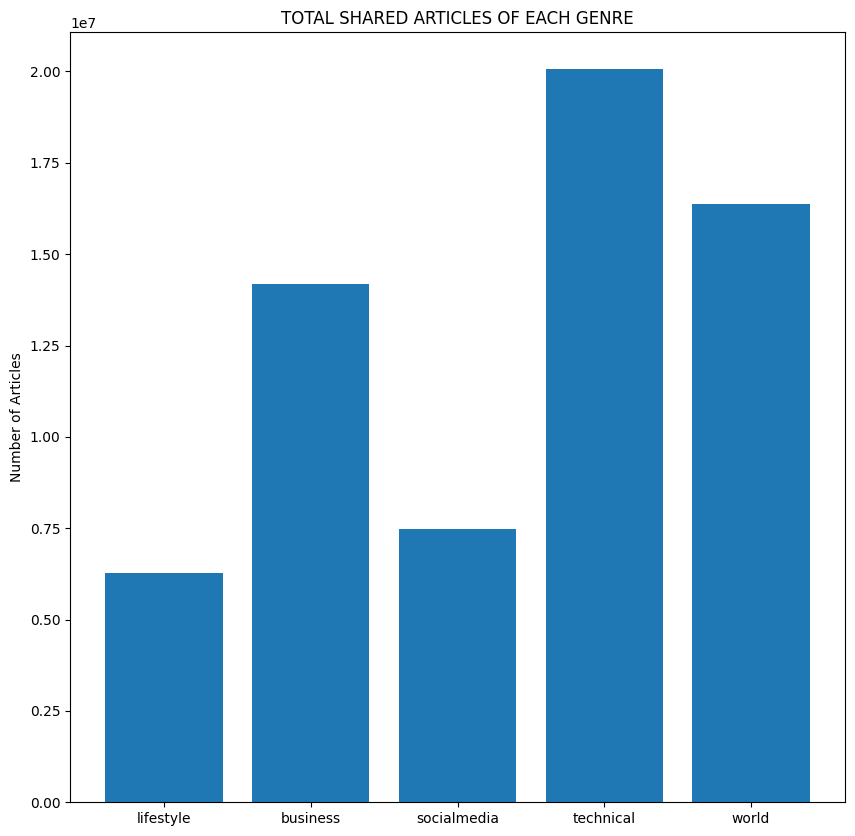

In [48]:
articles_types=np.array([lifestyle_articles,business_articles,socialmedia_articles,technical_articles,world_articles],dtype=np.int64)
fig= plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title('TOTAL SHARED ARTICLES OF EACH GENRE')
ax.set_ylabel('Number of Articles')
plt.bar(x=['lifestyle','business','socialmedia','technical','world'],height=articles_types)

In [49]:
articles_types

array([ 6272279, 14180070,  7481357, 20069193, 16379535])

In [52]:
monday_articles=data[data['weekday_is_monday'] == 1]['shares'].sum()
tuesday_articles=data[data['weekday_is_tuesday'] == 1]['shares'].sum()
wednesday_articles=data[data['weekday_is_wednesday'] == 1]['shares'].sum()
thursday_articles=data[data['weekday_is_thursday'] == 1]['shares'].sum()
friday_articles=data[data['weekday_is_friday'] == 1]['shares'].sum()
saturday_articles=data[data['weekday_is_saturday'] == 1]['shares'].sum()
sunday_articles=data[data['weekday_is_sunday'] == 1]['shares'].sum()
weekend_articles=data[data['is_weekend'] == 1]['shares'].sum()

<BarContainer object of 8 artists>

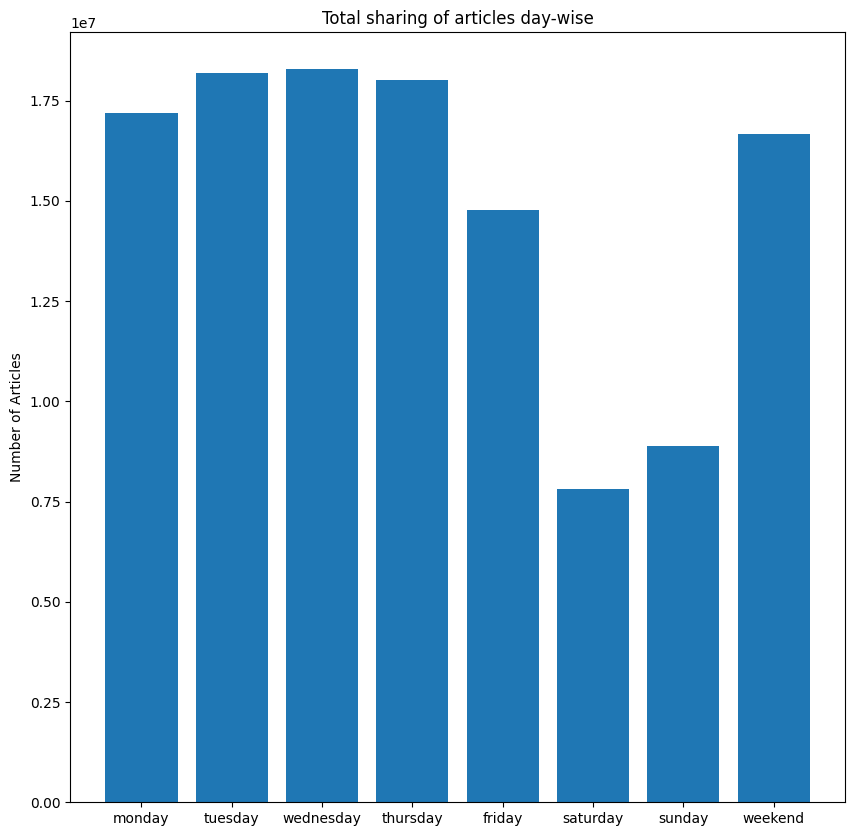

In [54]:
articles_publishing_days= np.array([monday_articles,tuesday_articles,wednesday_articles,thursday_articles,friday_articles,
                                    saturday_articles,sunday_articles,weekend_articles])
fig= plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title('Total sharing of articles day-wise')
ax.set_ylabel('Number of Articles')
plt.bar(x=['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend'],height=articles_publishing_days)

In [58]:
result=[]
days=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
     'weekday_is_saturday','weekday_is_sunday','is_weekend']
genre=['data_channel_is_lifestyle','data_channel_is_bus','data_channel_is_socmed',
       'data_channel_is_tech','data_channel_is_world']
for i in days:
    list1=[]
    for j in genre:
        list1.append(data.groupby([i,j])['shares'].sum()[1][1])
    print('Best channel on {} has articles {} and channel is {}'.format(i,max(list1),genre[list1.index(max(list1))]))

Best channel on weekday_is_monday has articles 3230332 and channel is data_channel_is_tech
Best channel on weekday_is_tuesday has articles 3883646 and channel is data_channel_is_tech
Best channel on weekday_is_wednesday has articles 3807165 and channel is data_channel_is_tech
Best channel on weekday_is_thursday has articles 3328651 and channel is data_channel_is_tech
Best channel on weekday_is_friday has articles 2607854 and channel is data_channel_is_tech
Best channel on weekday_is_saturday has articles 1764513 and channel is data_channel_is_tech
Best channel on weekday_is_sunday has articles 1447032 and channel is data_channel_is_tech
Best channel on is_weekend has articles 3211545 and channel is data_channel_is_tech


In [59]:
Worst_min_shares=pd.DataFrame(data.groupby(['kw_min_min'],sort=True)['shares'].sum())
Worst_max_shares=pd.DataFrame(data.groupby(['kw_max_min'],sort=True)['shares'].sum())
Worst_avg_shares=pd.DataFrame(data.groupby(['kw_avg_min'],sort=True)['shares'].sum())
Best_min_shares=pd.DataFrame(data.groupby(['kw_min_max'],sort=True)['shares'].sum())
Best_max_shares=pd.DataFrame(data.groupby(['kw_max_max'],sort=True)['shares'].sum())
Best_avg_shares=pd.DataFrame(data.groupby(['kw_avg_max'],sort=True)['shares'].sum())
Normal_min_shares=pd.DataFrame(data.groupby(['kw_min_avg'],sort=True)['shares'].sum())
Normal_max_shares=pd.DataFrame(data.groupby(['kw_max_avg'],sort=True)['shares'].sum())
Normal_avg_shares=pd.DataFrame(data.groupby(['kw_avg_avg'],sort=True)['shares'].sum())

<Axes: xlabel='kw_min_min'>

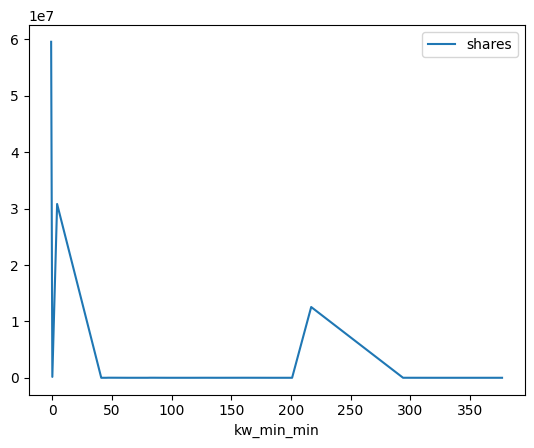

In [60]:
Worst_min_shares.plot()

In [61]:
Lda_00=pd.DataFrame(data.groupby(by=['LDA_00'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_01=pd.DataFrame(data.groupby(by=['LDA_01'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_02=pd.DataFrame(data.groupby(by=['LDA_02'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_03=pd.DataFrame(data.groupby(by=['LDA_03'])['shares'].sum().sort_values(ascending=False)).reset_index()
Lda_04=pd.DataFrame(data.groupby(by=['LDA_04'])['shares'].sum().sort_values(ascending=False)).reset_index()

In [62]:
mean_lda_00=np.mean(Lda_00[Lda_00['shares'] > 50])[0]
mean_lda_01=np.mean(Lda_01[Lda_01['shares'] > 50])[0]
mean_lda_02=np.mean(Lda_02[Lda_02['shares'] > 50])[0]
mean_lda_03=np.mean(Lda_03[Lda_03['shares'] > 50])[0]
mean_lda_04=np.mean(Lda_04[Lda_04['shares'] > 50])[0]

<BarContainer object of 5 artists>

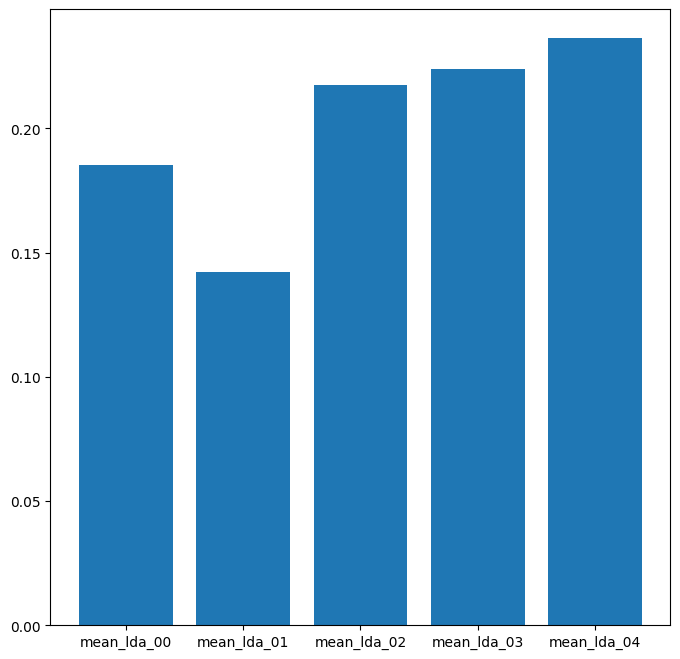

In [63]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
plt.bar(x=['mean_lda_00','mean_lda_01','mean_lda_02','mean_lda_03','mean_lda_04'],
        height=[mean_lda_00,mean_lda_01,mean_lda_02,mean_lda_03,mean_lda_04])

<Axes: xlabel='global_subjectivity', ylabel='shares'>

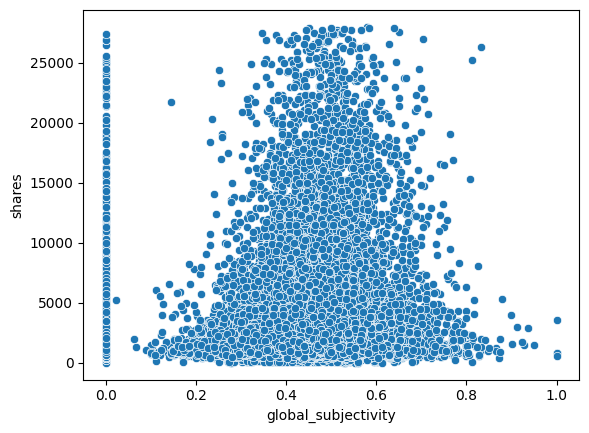

In [64]:
sns.scatterplot(x=data['global_subjectivity'],y=data['shares'])

In [66]:
columns_group_3=['global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares']

<Axes: >

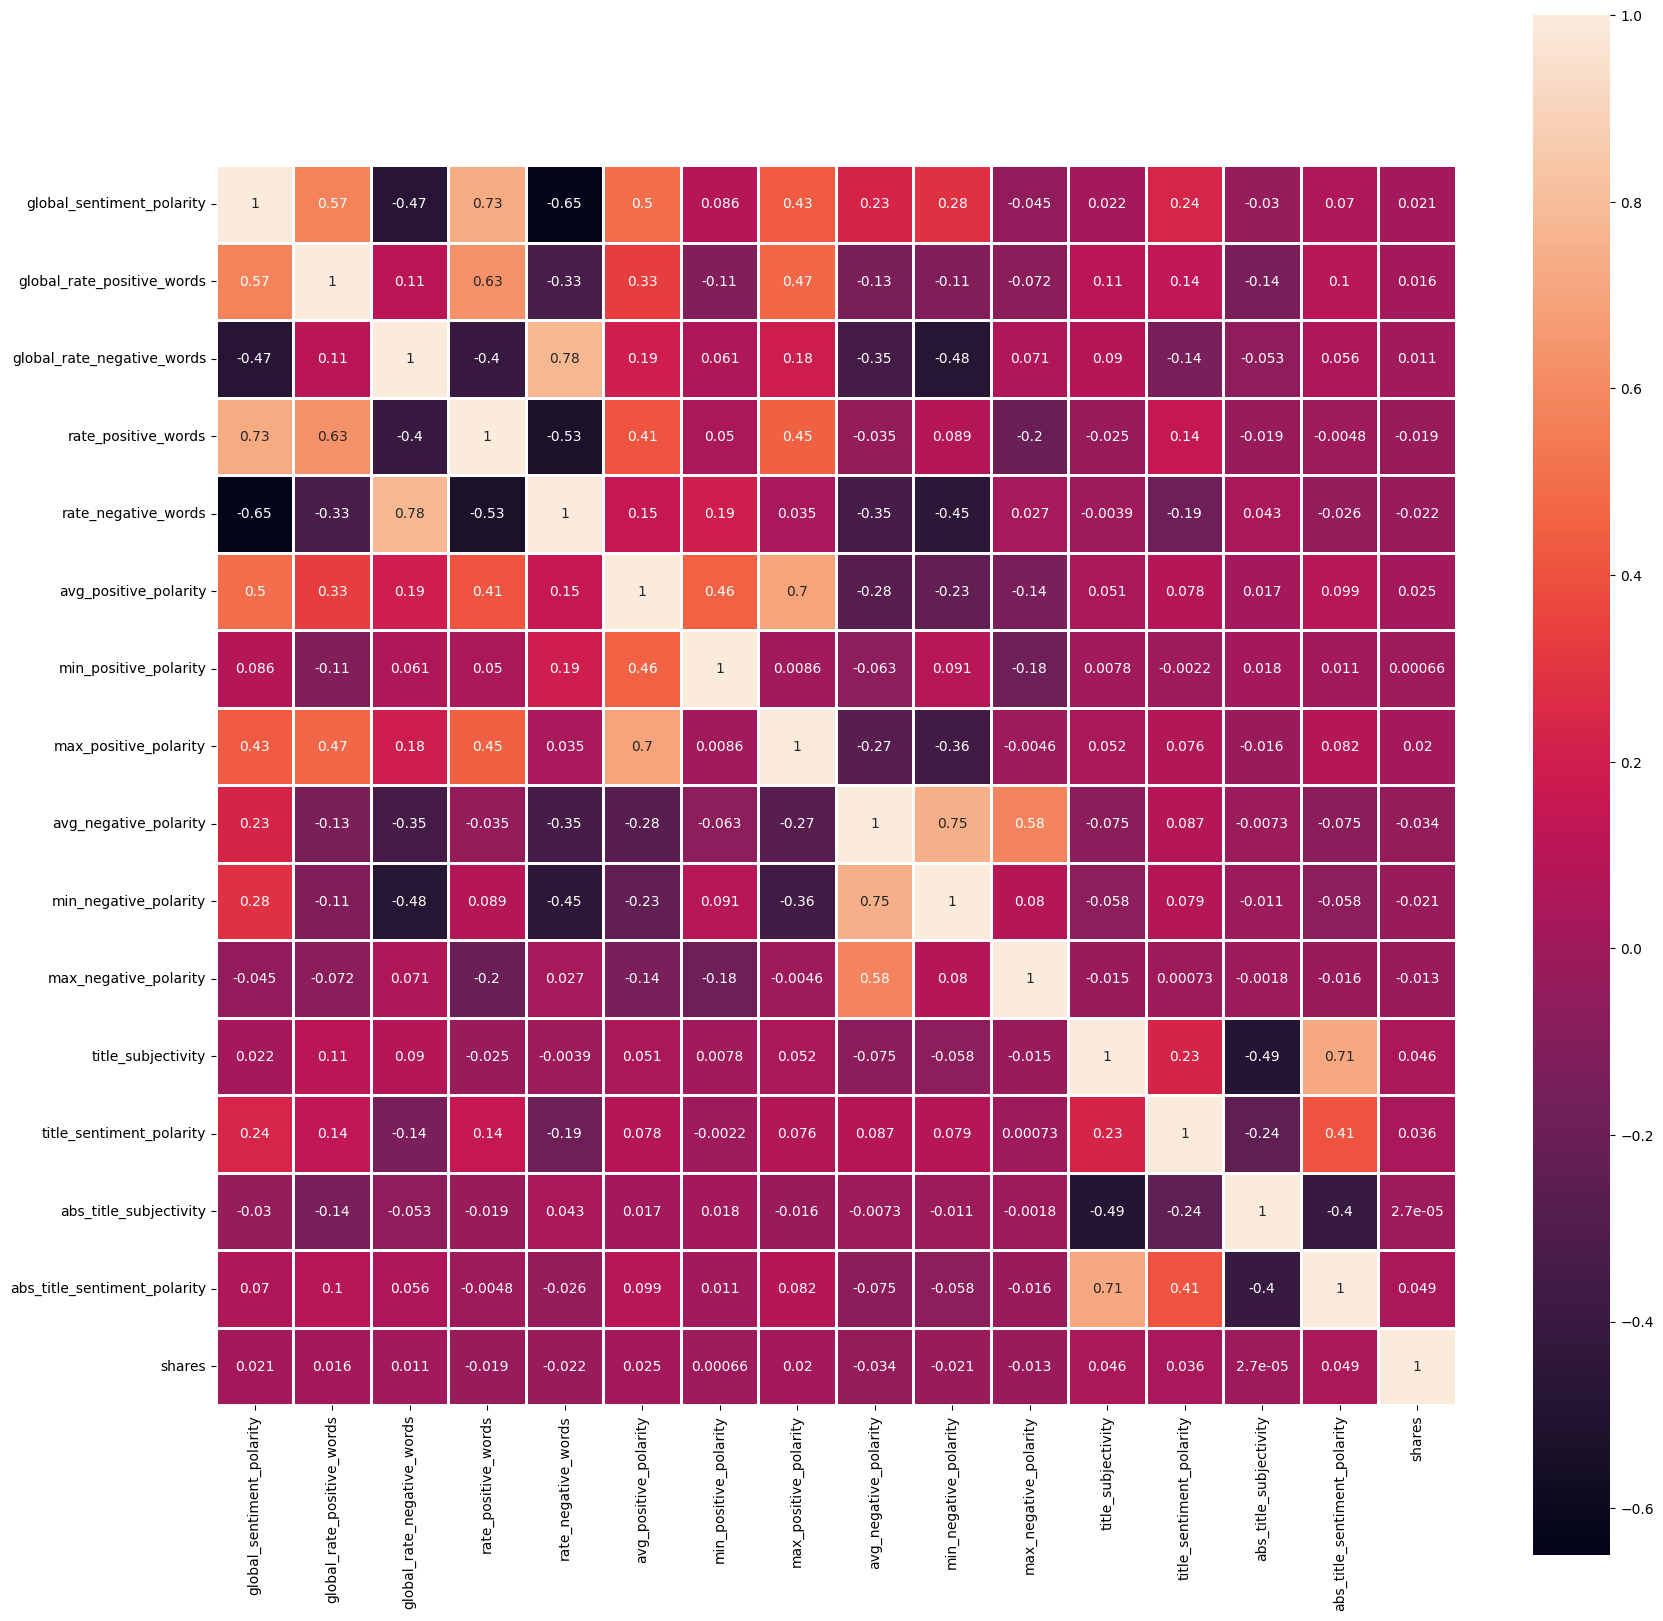

In [67]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(data[columns_group_3].corr(),linewidth=1.0,ax=ax,square=True,annot=True)

In [68]:
from sklearn.decomposition import PCA

In [69]:
y= data['shares']

In [70]:
pca_data=data.drop(labels=['url','shares','date'],axis=1)

In [71]:
pca_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [72]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_transformed= scaler.fit_transform(pca_data)

In [73]:
pca=PCA()
principal_comp=pd.DataFrame(pca.fit_transform(pca_data))

In [74]:
principal_comp.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,791021.495428,83404.305658,-4678.168676,-5776.270379,-144.076118,-4092.341275,-102.275303,650.736809,1038.849780,936.544594,...,0.005491,-0.009271,0.005382,0.052455,0.011097,-0.002560,-0.003052,-4.487488e-07,2.650859e-10,-4.932733e-12
1,791031.717685,83378.123283,-4483.142243,-6536.584976,-491.641366,-4081.641056,-117.560039,647.114347,1038.175264,952.836909,...,-0.040361,-0.007435,-0.004695,-0.016577,0.024048,0.002821,0.002272,-1.313122e-06,-8.869519e-11,-1.149777e-10
2,791012.797033,83426.566435,-4844.084574,-5129.380620,151.599427,-4101.483712,-89.155679,653.873676,1039.316305,933.230955,...,-0.050266,0.037994,0.067029,-0.045597,-0.040833,-0.015745,0.000572,6.488661e-07,-4.320550e-11,1.738182e-10
3,791031.702526,83377.935742,-4482.973401,-6536.472238,-492.072895,-4082.110141,-116.145104,647.777587,1036.835804,1081.576060,...,0.031495,0.020979,-0.029307,-0.020405,0.002897,0.005661,0.000900,6.731578e-07,-3.170485e-11,1.994736e-12
4,790836.088810,83897.886679,-8235.468719,7996.887885,-6443.340052,-4532.560234,2124.075318,724.081334,1037.112774,1321.347730,...,-0.064586,0.010790,0.042097,-0.015292,0.000365,0.013418,-0.004283,-6.134374e-07,7.578572e-11,3.193982e-12


In [75]:
pca.explained_variance_ratio_

array([7.63976554e-01, 1.63195754e-01, 3.52492986e-02, 3.17219496e-02,
       4.84094167e-03, 6.01627888e-04, 2.77247942e-04, 1.12639413e-04,
       1.67201215e-05, 3.46046463e-06, 2.90853352e-06, 5.28805716e-07,
       3.47409938e-07, 1.79607444e-08, 1.46381115e-09, 7.59014860e-10,
       7.15471984e-10, 2.16898393e-10, 1.59100963e-10, 5.90130965e-11,
       3.75327159e-11, 9.35781288e-12, 3.59951878e-12, 3.15248023e-12,
       2.73366160e-12, 2.65784910e-12, 2.63119067e-12, 2.60477714e-12,
       2.42879948e-12, 2.16956337e-12, 2.11278768e-12, 1.19290115e-12,
       1.02603041e-12, 9.27831512e-13, 8.52270783e-13, 7.96517257e-13,
       7.72828491e-13, 6.49858477e-13, 3.80464247e-13, 3.66363498e-13,
       3.44065381e-13, 3.24521033e-13, 2.71216098e-13, 2.30916328e-13,
       1.49117430e-13, 1.12166411e-13, 8.07278714e-14, 6.68598282e-14,
       6.29388154e-14, 3.26726283e-14, 2.16222079e-14, 1.79645290e-14,
       1.20365051e-14, 6.66033423e-15, 1.89505378e-15, 2.20213457e-16,
      

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [77]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(pca_data, y,  
    test_size=test_size,random_state=23)

In [78]:
param_grid= {'n_estimators':[20,40],
            'max_depth':[10,20],
             'max_features':['auto',10,20],
             'bootstrap':[True,False],             
            }

In [79]:
random_search= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid,
                                  cv=5,scoring='neg_mean_absolute_error',
                         verbose=1,n_jobs=-1)
randomsearch_result=random_search.fit(X_train,y_train)
best_paramters= randomsearch_result.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [80]:
pd.DataFrame(randomsearch_result.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,33.182171,2.989043,0.038396,0.004581,40,auto,10,True,"{'n_estimators': 40, 'max_features': 'auto', '...",-1939.508431,-1942.714340,-1877.262680,-1912.407818,-1917.970134,-1917.972681,23.512593,1
2,12.038528,0.418514,0.063459,0.026962,40,20,10,True,"{'n_estimators': 40, 'max_features': 20, 'max_...",-1939.397556,-1946.040956,-1880.244719,-1907.271194,-1921.777839,-1918.946453,23.641118,2
8,17.893253,0.747569,0.041740,0.001120,40,20,10,False,"{'n_estimators': 40, 'max_features': 20, 'max_...",-1941.841707,-1943.114258,-1883.634685,-1909.591985,-1929.516309,-1921.539789,22.453496,3
3,17.047512,0.581585,0.129604,0.057475,40,10,20,False,"{'n_estimators': 40, 'max_features': 10, 'max_...",-2003.161716,-2013.588675,-1964.638655,-1991.127446,-1994.429977,-1993.389294,16.348171,4
1,22.328270,0.564840,0.121456,0.043211,40,20,20,True,"{'n_estimators': 40, 'max_features': 20, 'max_...",-2000.044087,-2020.311738,-1968.755806,-2010.159685,-1997.885936,-1999.431450,17.290694,5
6,32.878896,0.522781,0.116041,0.044676,40,20,20,False,"{'n_estimators': 40, 'max_features': 20, 'max_...",-2015.092058,-2029.569330,-1993.010097,-2012.890512,-2000.960396,-2010.304479,12.547115,6
7,5.630873,0.804203,0.048166,0.001948,20,10,20,True,"{'n_estimators': 20, 'max_features': 10, 'max_...",-2033.258184,-2048.287435,-1968.605397,-1999.370906,-2009.657947,-2011.835974,27.628336,7
5,51.704651,0.171393,0.042574,0.002322,40,auto,10,False,"{'n_estimators': 40, 'max_features': 'auto', '...",-2046.124650,-2060.795051,-2006.061471,-2005.021835,-2014.044447,-2026.409491,22.783425,8
0,27.321180,0.762696,0.023911,0.000759,20,auto,10,False,"{'n_estimators': 20, 'max_features': 'auto', '...",-2050.339888,-2063.423665,-2006.877534,-2008.756793,-2013.906959,-2028.660968,23.523586,9
4,47.569385,0.629807,0.068948,0.023372,20,auto,20,False,"{'n_estimators': 20, 'max_features': 'auto', '...",-2358.271360,-2406.135707,-2387.899571,-2460.294412,-2402.715044,-2403.063219,33.230160,10


In [81]:
best_paramters

{'n_estimators': 40,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [82]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=40,max_depth=10,max_features=10)
scores=cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)

In [83]:
absolute_scores= -scores.mean()

In [84]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=40)

In [85]:
from sklearn.metrics import mean_absolute_error
y_pred=rf.predict(X_test)
test_score=mean_absolute_error(y_test,y_pred)

In [86]:
test_score

1945.724974928055

In [87]:
pd.DataFrame({'actual_train_mae_score':absolute_scores,
             'actual_test_mae_score':test_score},index=['Mean'])

,actual_train_mae_score,actual_test_mae_score
Mean,1913.310368,1945.724975


In [88]:
df=pd.DataFrame(rf.feature_importances_,pca_data.columns).reset_index()

In [89]:
df.columns=['variables','score']

In [90]:
sorted_df=df.sort_values('score',ascending=False)

In [91]:
important_variables=sorted_df.iloc[1:15,:]

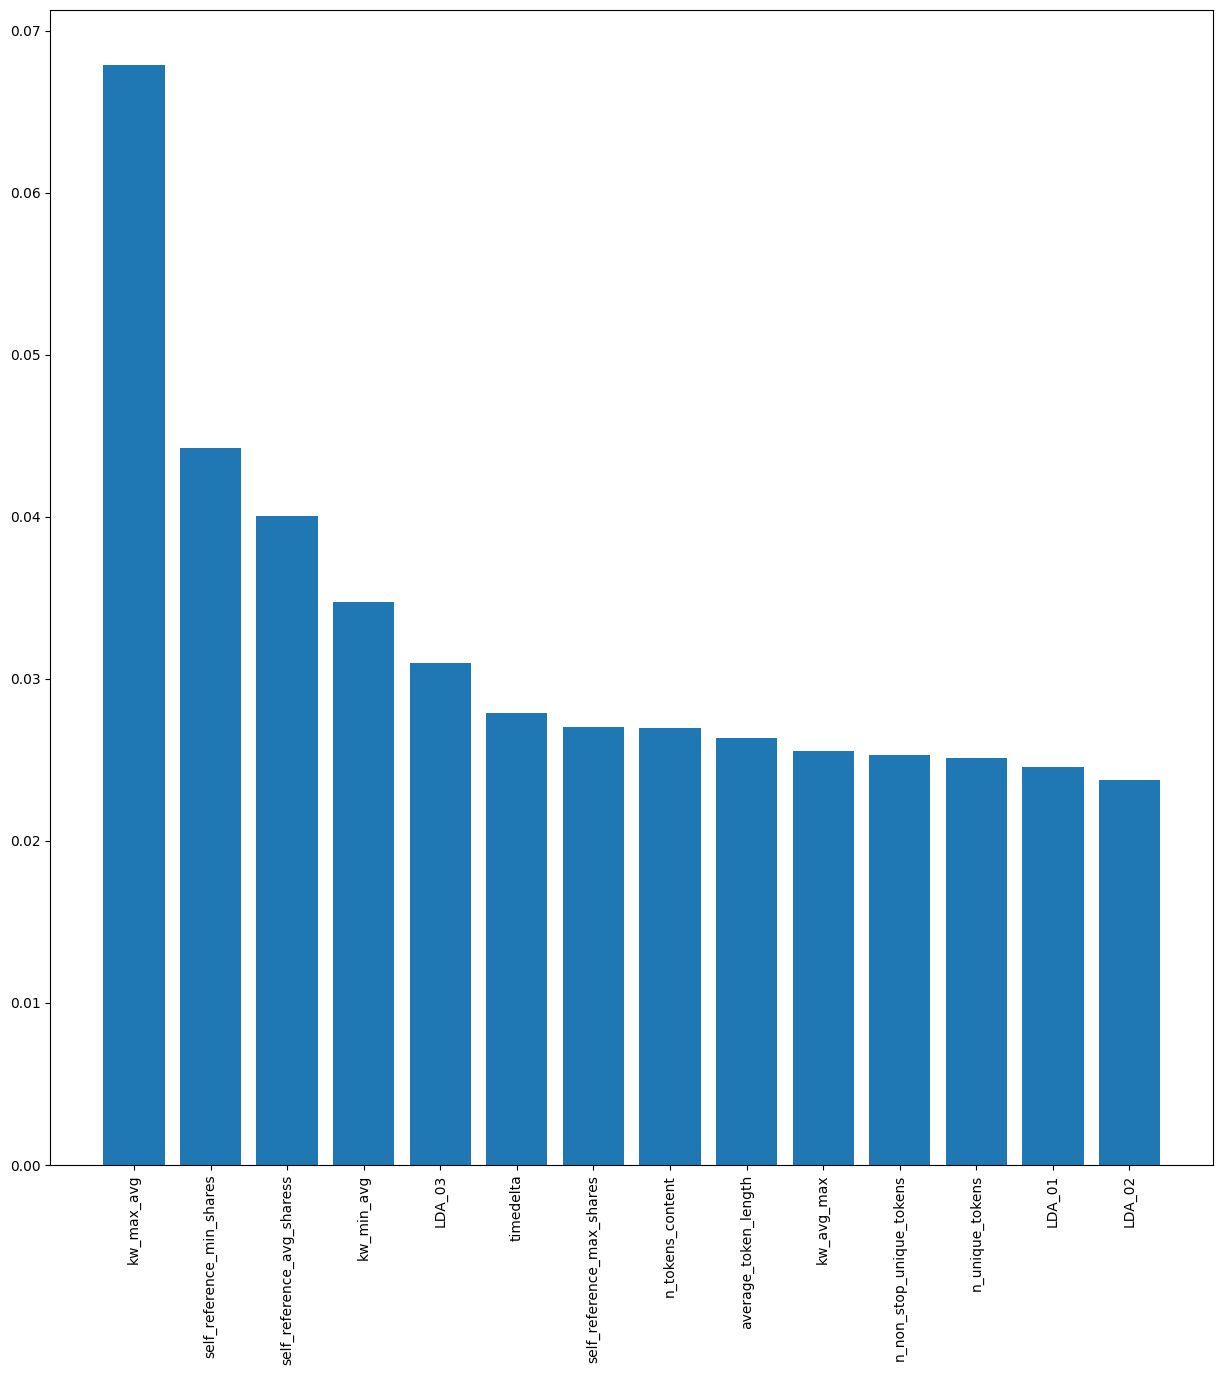

In [93]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
plt.bar(x=important_variables.variables,height=important_variables.score)
plt.xticks(rotation=90)
plt.show()

In [94]:
pca_final_data=principal_comp[[0,1]]

In [95]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(pca_final_data,y,test_size=0.2,random_state=23)

In [96]:
param_grid_pca= {'n_estimators':[20,40],
            'max_depth':[10,20],
             'bootstrap':[True,False],             
            }

In [97]:
random_search_pca= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid_pca,
                                  cv=5,scoring='neg_mean_absolute_error',
                                  verbose=1,n_jobs=-1)
randomsearch_result_pca=random_search_pca.fit(X_train_pca,y_train_pca)
best_paramters_pca= randomsearch_result_pca.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [98]:
best_paramters_pca

{'n_estimators': 40, 'max_depth': 10, 'bootstrap': True}

In [99]:
rf_pca=RandomForestRegressor(n_estimators=20,max_depth=10)

In [100]:
scores_1=cross_val_score(rf_pca,X_train_pca,y_train_pca,scoring='neg_mean_absolute_error',cv=10)

In [101]:
absolute_scores_1=-scores_1.mean()

In [102]:
rf_pca.fit(X_train_pca,y_train_pca)

RandomForestRegressor(max_depth=10, n_estimators=20)

In [103]:
y_predict_pca= rf_pca.predict(X_test_pca)
test_score_pca= mean_absolute_error(y_test_pca,y_predict_pca)

In [104]:
pd.DataFrame({'train_mse_score':[absolute_scores_1],
             'test_mse_score':[test_score_pca]},index=['Mean'])

,train_mse_score,test_mse_score
Mean,2035.260611,2067.058822


In [105]:
X_train.shape[0]

31340

In [106]:
train_sizes=[500,800,1000,1250,2500,5000,10000,12000,16000,18000,20000]

In [107]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,validation_scores= learning_curve(rf,X=X_train,y=y_train,train_sizes=train_sizes,
                                             cv=3,scoring='neg_mean_absolute_error')

In [108]:
train_scores_mean= -train_scores.mean(axis=1)
validation_scores_mean=-validation_scores.mean(axis=1)

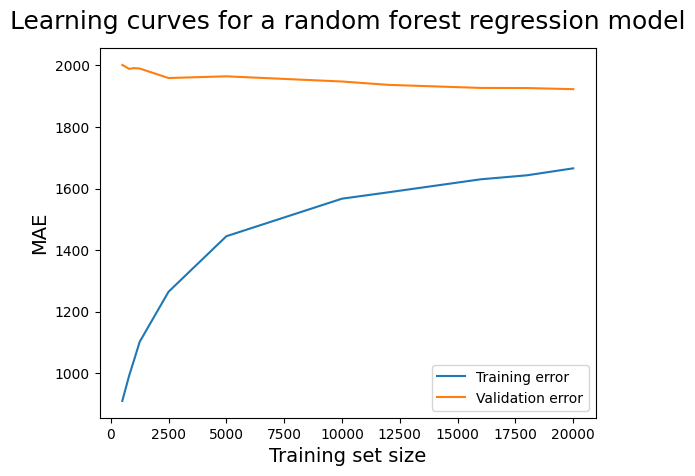

In [109]:
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03)
plt.legend()

In [110]:
train_sizes,train_scores_pca,validation_scores_pca= learning_curve(rf_pca,X=X_train_pca,y=y_train_pca,train_sizes=train_sizes, cv=3,scoring='neg_mean_absolute_error')

In [111]:
train_scores_mean_pca= -train_scores_pca.mean(axis=1)
validation_scores_mean_pca=-validation_scores_pca.mean(axis=1)


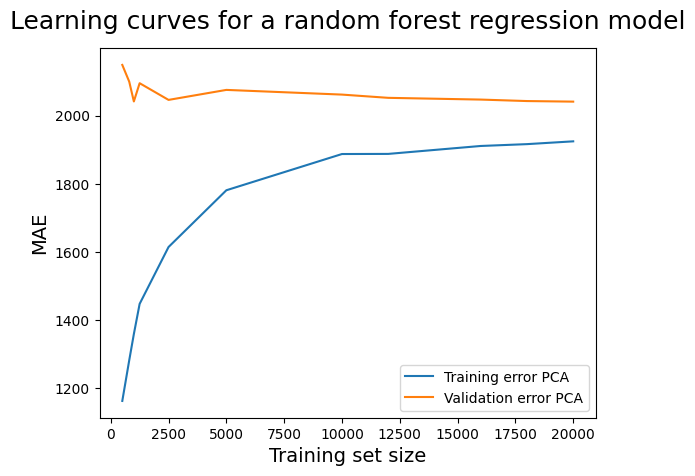

In [112]:
plt.plot(train_sizes, train_scores_mean_pca, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_pca, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03)
plt.legend()

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
param_gradboost={'n_estimators':[100,150],
                'max_depth':[5,10],
                'learning_rate':[0.1,0.2]}

In [171]:
pca_data_gbr= principal_comp[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X_train_gbr,X_test_gbr,y_train_gbr,y_test_gbr=train_test_split(pca_data_gbr,y,test_size=0.2,random_state=23)

In [119]:
grad_randomsearch= RandomizedSearchCV(GradientBoostingRegressor(),param_distributions=param_gradboost,cv=3,
                                      scoring='neg_mean_absolute_error',n_jobs=-1,verbose=1)
grad_fit=grad_randomsearch.fit(X_train_gbr,y_train_gbr)
best_param_grad= grad_fit.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [121]:
pd.DataFrame(grad_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,35.113004,1.003430,0.030216,0.000446,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1948.293779,-1920.693878,-1946.504586,-1938.497414,12.610174,1
1,50.392084,0.083537,0.041518,0.000461,150,5,0.1,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-1958.417861,-1924.239031,-1957.657501,-1946.771464,15.935860,2
2,65.321494,1.321118,0.096833,0.027245,100,10,0.1,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2019.845162,-1992.618737,-2021.104308,-2011.189402,13.141501,5
3,99.059915,0.550374,0.112116,0.040427,150,10,0.1,"{'n_estimators': 150, 'max_depth': 10, 'learni...",-2043.977378,-2014.987672,-2039.306899,-2032.757316,12.708882,6
4,33.688522,0.618656,0.041195,0.011014,100,5,0.2,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1972.448064,-1936.800899,-1977.394099,-1962.214354,18.083116,3
5,54.331817,1.534333,0.054039,0.019034,150,5,0.2,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-1991.572065,-1954.196442,-1980.502835,-1975.423781,15.675499,4
6,67.508391,0.341365,0.057690,0.000832,100,10,0.2,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2097.135914,-2071.260295,-2084.168232,-2084.188147,10.563687,7
7,95.708590,10.935970,0.105832,0.041375,150,10,0.2,"{'n_estimators': 150, 'max_depth': 10, 'learni...",-2105.728265,-2087.775938,-2091.648415,-2095.050872,7.713799,8


In [122]:
best_param_grad

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [123]:
gbr= GradientBoostingRegressor(n_estimators=50,max_depth=5,learning_rate=0.1)

In [124]:
grad_result= gbr.fit(X_train_gbr,y_train_gbr)

In [125]:
scores_boosting= cross_val_score(gbr,X_train_gbr,y_train_gbr,scoring='neg_mean_absolute_error',cv=5)

In [128]:
absolute_scores_boosting= - scores_boosting.mean()

In [129]:
y_pred_gbr=gbr.predict(X_test_gbr)
test_score_gbr= mean_absolute_error(y_test_gbr,y_pred_gbr)

In [130]:
pd.DataFrame({'train_mae_score':[absolute_scores_boosting],
             'test_mae_score':[test_score_gbr]},index=['Mean'])

,train_mae_score,test_mae_score
Mean,1927.60965,1951.696454


In [131]:
train_sizes,train_scores_gbr,validation_scores_gbr= learning_curve(gbr,X=X_train_pca,y=y_train_pca,train_sizes=train_sizes, cv=5,scoring='neg_mean_absolute_error')

In [132]:
train_scores_mean_gbr= -train_scores_gbr.mean(axis=1)
validation_scores_mean_gbr=-validation_scores_gbr.mean(axis=1)

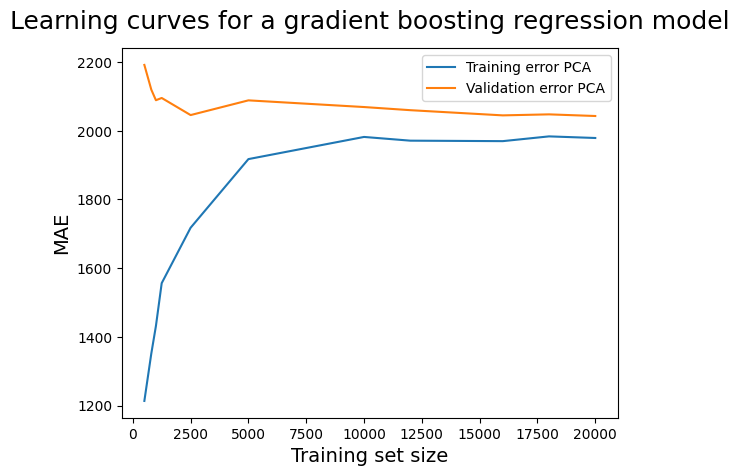

In [133]:
plt.plot(train_sizes, train_scores_mean_gbr, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_gbr, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a gradient boosting regression model', fontsize = 18, y = 1.03)
plt.legend()

In [134]:
gbr_original=gbr.fit(X_train,y_train)

In [136]:
df_1=pd.DataFrame(X_train.columns,gbr_original.feature_importances_).reset_index()
df_1.columns=['score','variables']
select_columns=df_1.sort_values('score',ascending=False)['variables']

In [137]:
feature_importance_df= pd.concat(objs=[df,df_1],axis=1)
feature_importance_df

,variables,score,score,variables
0,timedelta,0.027909,0.039922,timedelta
1,n_tokens_title,0.014449,0.005483,n_tokens_title
2,n_tokens_content,0.026979,0.023418,n_tokens_content
3,n_unique_tokens,0.025126,0.025245,n_unique_tokens
4,n_non_stop_words,0.000524,0.000000,n_non_stop_words
5,n_non_stop_unique_tokens,0.025266,0.016770,n_non_stop_unique_tokens
6,num_hrefs,0.021960,0.030618,num_hrefs
7,num_self_hrefs,0.012287,0.013264,num_self_hrefs
8,num_imgs,0.016709,0.020573,num_imgs
9,num_videos,0.008789,0.020558,num_videos


In [138]:
feature_importance_df.columns=['Variables_rf','Score_rf','score_gb','Variables_gb']
feature_importance_df=feature_importance_df.sort_values('Score_rf',ascending=False).reset_index(drop=True)

In [139]:
np.sum(feature_importance_df['score_gb'][0:25])

0.8074774770684398

In [140]:
select_columns=df_1.sort_values('score',ascending=False)['variables'][0:25]

In [141]:
X_train_select,X_test_select,y_train_select,y_test_select=train_test_split(data[select_columns.reset_index()['variables']], y,test_size=0.2,random_state=23)

In [142]:
grad_randomsearch_select= RandomizedSearchCV(GradientBoostingRegressor(),param_distributions=param_gradboost,cv=3,
                                      scoring='neg_mean_absolute_error',n_jobs=-1,verbose=1)
grad_fit_select=grad_randomsearch_select.fit(X_train_select,y_train_select)
best_param_grad_select= grad_fit_select.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [143]:
pd.DataFrame(grad_fit_select.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,39.871086,0.077799,0.035403,0.001534,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1938.059471,-1888.701205,-1900.086622,-1908.949099,21.102405,1
1,59.151929,0.497828,0.047632,0.001050,150,5,0.1,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-1945.744153,-1900.531261,-1905.943284,-1917.406233,20.159378,2
2,77.349374,0.586697,0.096322,0.032532,100,10,0.1,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2019.031304,-1980.356238,-2009.952094,-2003.113212,16.512983,5
3,116.033187,0.403272,0.135822,0.045349,150,10,0.1,"{'n_estimators': 150, 'max_depth': 10, 'learni...",-2025.107244,-1996.482892,-2024.485323,-2015.358486,13.349475,6
4,39.873281,0.171246,0.045286,0.015403,100,5,0.2,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1950.428031,-1920.881203,-1941.414143,-1937.574459,12.364226,3
5,59.843018,0.873449,0.045320,0.000874,150,5,0.2,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-1970.724097,-1940.258055,-1970.603577,-1960.528576,14.333507,4
6,77.568494,0.401401,0.090025,0.032531,100,10,0.2,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2086.591468,-2053.733353,-2075.841292,-2072.055371,13.678787,7
7,107.198967,12.876654,0.119285,0.047113,150,10,0.2,"{'n_estimators': 150, 'max_depth': 10, 'learni...",-2094.316127,-2063.088626,-2081.429574,-2079.611443,12.813233,8


In [144]:
best_param_grad_select

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [145]:
gbr_select= GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.1)

In [146]:
grad_result_select= gbr_select.fit(X_train_select,y_train_select)

In [147]:
scores_boosting_select= cross_val_score(gbr_select,X_train_select,y_train_select,scoring='neg_mean_absolute_error',cv=5)

In [148]:
absolute_scores_boosting_select= - scores_boosting_select.mean()

In [149]:
y_pred_gbr_select=gbr_select.predict(X_test_select)
test_score_gbr_select= mean_absolute_error(y_test_select,y_pred_gbr_select)

In [150]:
pd.DataFrame({'train_mae_score':[absolute_scores_boosting_select],
             'test_mae_score':[test_score_gbr_select]},index=['Mean'])

,train_mae_score,test_mae_score
Mean,1901.994518,1922.401571


In [151]:
train_sizes,train_scores_select,validation_scores_select= learning_curve(gbr_select,X=X_train_select,y=y_train_select,train_sizes=train_sizes, cv=5,scoring='neg_mean_absolute_error')

In [153]:
train_scores_mean_select= -train_scores_select.mean(axis=1)
validation_scores_mean_select=-validation_scores_select.mean(axis=1)

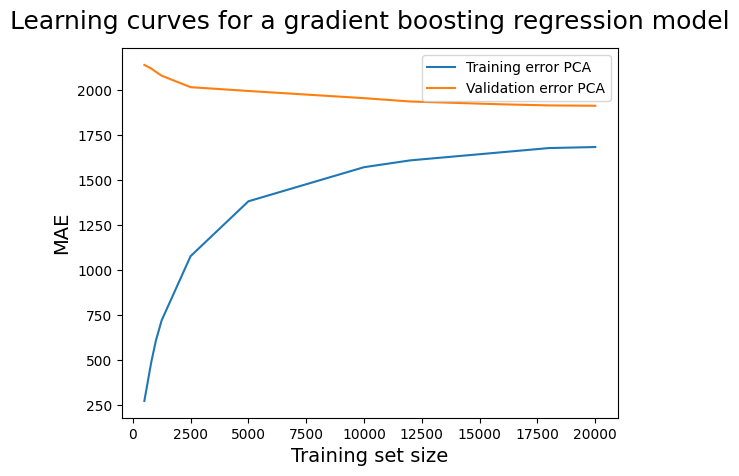

In [154]:
plt.plot(train_sizes, train_scores_mean_select, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_select, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a gradient boosting regression model', fontsize = 18, y = 1.03)
plt.legend()

In [156]:
Comparison_df= pd.DataFrame({'Training_Scores':[absolute_scores,absolute_scores_1,  absolute_scores_boosting,absolute_scores_boosting_select], 'Test_Scores':[test_score,test_score_pca,test_score_gbr,test_score_gbr_select]},
                            index=['Rf','Rf_PCA','gbr','gbr_select'])

In [157]:
Comparison_df['Variance']=np.subtract(Comparison_df['Training_Scores'],Comparison_df['Test_Scores'])

In [158]:
Comparison_df=Comparison_df.sort_values('Training_Scores')

In [159]:
Comparison_df

,Training_Scores,Test_Scores,Variance
gbr_select,1901.994518,1922.401571,-20.407053
Rf,1913.310368,1945.724975,-32.414607
gbr,1927.609650,1951.696454,-24.086804
Rf_PCA,2035.260611,2067.058822,-31.798211


In [160]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,date
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2013-01-07
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2013-01-07
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2013-01-07
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2013-01-07
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2013-01-07


In [175]:
X1= rf.predict(pca_data)
X2=rf_pca.predict(pca_final_data)
X4=gbr_select.predict(data[select_columns.reset_index()['variables']])

In [179]:
data_stacking= pd.DataFrame({'Random_Forest':X1,'Random_Forest_PCA':X2,"Target":y})
data_stacking.head()

,Random_Forest,Random_Forest_PCA,Target
0,1838.242186,1258.608706,593
1,1802.402402,1147.126992,711
2,2206.994231,1475.152388,1500
3,2056.464820,1348.744925,1200
4,2255.579535,1350.858036,505


In [180]:
from sklearn.linear_model import LinearRegression

In [182]:
X_train_stack,X_test_stack,y_train_stack,y_test_stack= train_test_split(data_stacking[['Random_Forest','Random_Forest_PCA']],y,test_size=0.2)

In [183]:
lr=LinearRegression()
lr.fit(X_train_stack,y_train_stack)

LinearRegression()

In [184]:
training_score_lr= cross_val_score(lr,X_train_stack,y_train_stack,scoring='neg_mean_absolute_error',cv=20)
absolute_training_lr= -training_score_lr.mean()

In [185]:
y_predict_lr= lr.predict(X_test_stack)
test_score_lr= mean_absolute_error(y_test_stack,y_predict_lr)

In [186]:
train_sizes,train_scores_lr,validation_scores_lr= learning_curve(lr,X=X_train_stack,y=y_train_stack,train_sizes=train_sizes,cv=10,scoring='neg_mean_absolute_error')

In [187]:
train_scores_mean_lr= -train_scores_lr.mean(axis=1)
validation_scores_mean_lr=-validation_scores_lr.mean(axis=1)

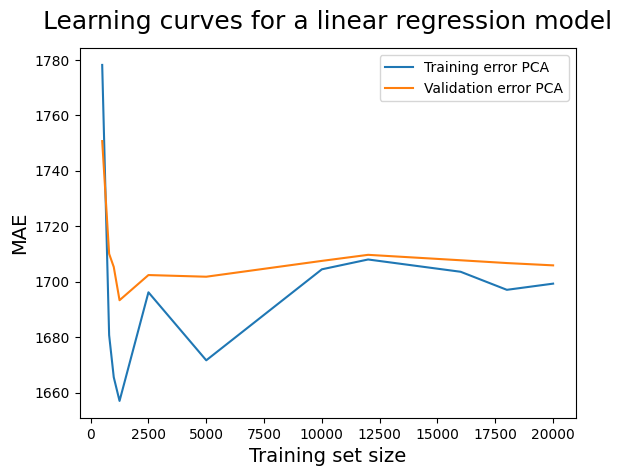

In [188]:
plt.plot(train_sizes, train_scores_mean_lr, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_lr, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()